In [73]:
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
plt.style.use('ggplot')



### Problem Experiment

In [3]:
sigma = 10.0
b = 8/3
rho_crit = 470/19


In [4]:
class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

In [77]:
def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-20, 20))
    ax.set_ylim((-30, 30))
    ax.set_zlim((5, 55))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

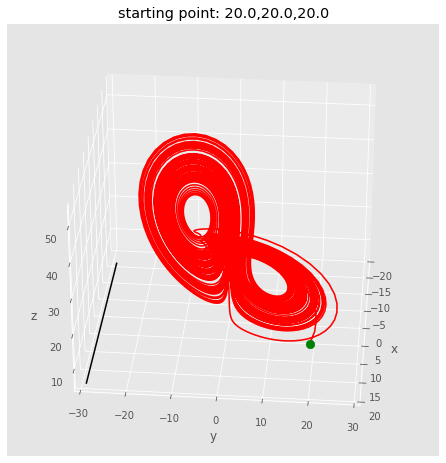

In [82]:
#
# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=100,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=28)
initvars=dict(x=20,y=20,z=20)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist = theSolver.timeloop5fixed()
xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]


fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals,yvals,zvals)
out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
#help(ax.view_init)

In [79]:
print(f'Final coordinates are: x = {coords[-1,0]}, y = {coords[-1,1]}, z = {coords[-1,2]}')

Final coordinates are: x = -12.687089881195845, y = -6.819737351907877, z = 37.86367896978919


In [83]:
print(f'Final coordinates are: x = {coords[-1,0]}, y = {coords[-1,1]}, z = {coords[-1,2]}')

Final coordinates are: x = -4.874856552552953, y = -8.065092513957634, z = 14.606399151827382


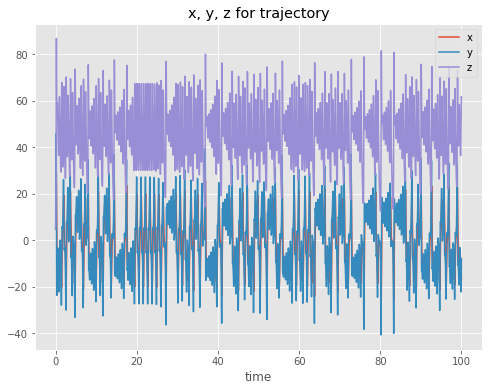

In [65]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(timevals,xvals,label='x')
ax.plot(timevals,yvals,label='y')
ax.plot(timevals,zvals,label='z')
ax.set(title='x, y, z for trajectory',xlabel='time')
out=ax.legend()


#### Question 1

Increasing $\rho$ increases the scale of the wings, but does not appear to send the functions into instability. At the end of the sequence the function begins to vary from the wings, but not by much.

#### Question 2

Changing the initial location does change where the solution ends up. Initial conditions of $(5,5,5)$ have final solutions: $x ~ -12.6, y ~ -6.8, z ~ 37.9$. Initial conditions of $(20,20,20)$ have final solutions: $x ~ -4.9, y ~ -8.1, z ~ 14.6$.

#### Question 3

### Problem Eigenvalues